### Purpose of this exercise

To demonstrate the tradeoffs of a random forest classifier between acuraccy and computational load. Given a dataset that can be run with very little cleaning and engineering and produce accuracy results of 98% out of the box but with a heavy computational workload, how can I reduce the features to get adaquate results - above 90% accuracy - with less processor workload?

In [2]:
def data_missing_values_assesment(frame):
    for column in frame.columns:
        problems = []
        if frame[column].dtype == 'object':
            for value in frame[column]:
                string = ''
                try:
                    string + value
                except:
                    problems.append(value)
                    
                    
                    
        if frame[column].dtype == 'float' or 'float64' or 'int':
            for value in frame[column]:
                try:
                    float(value)
                except:
                    problems.append(value)
                    
                    
                    
        print('The data type of column {} is {}'.format(column, frame[column].dtype))
        print('There are {} problem values'.format(len(problems)))
        print('\n', 40 * '-')

In [112]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [4]:
def print_nulls(df):
    
    out = df.isnull().sum()*100/df.isnull().isnull().count()
    
    pd.set_option('display.max_rows', len(out))
    print(out)
    pd.reset_option('display.max_rows')

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

%matplotlib inline

In [25]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/home/owen/bin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
# remove the bottom two rows that only contain null values

y2015 = y2015[:-2]

In [27]:
print_nulls(y2015)

id                                 0.000000
member_id                          0.000000
loan_amnt                          0.000000
funded_amnt                        0.000000
funded_amnt_inv                    0.000000
term                               0.000000
int_rate                           0.000000
installment                        0.000000
grade                              0.000000
sub_grade                          0.000000
emp_title                          5.669505
emp_length                         5.655968
home_ownership                     0.000000
annual_inc                         0.000000
verification_status                0.000000
issue_d                            0.000000
loan_status                        0.000000
pymnt_plan                         0.000000
url                                0.000000
desc                              99.989314
purpose                            0.000000
title                              0.031347
zip_code                        

In [28]:
### Grab a few columns that look important:

kept = [
    'loan_amnt'
        ,'funded_amnt'
        ,'funded_amnt_inv'
        ,'term'
        ,'int_rate'
        ,'installment'
        ,'grade'
        ,'emp_length'
        ,'home_ownership'
        ,'annual_inc'
        ,'verification_status'
        ,'loan_status'
        ,'pymnt_plan'
        ,'purpose'
        ,'dti'
        ,'delinq_2yrs'
        ,'inq_last_6mths'
        ,'mths_since_last_delinq'
        ,'mths_since_last_record'
        ,'open_acc'
        ,'revol_bal'
        ,'total_acc'
        ,'total_pymnt'
        ,'total_pymnt_inv'
        ,'total_rec_prncp'
        ,'total_rec_int'
        ,'total_rec_late_fee'
        ,'recoveries'
        ,'collection_recovery_fee'
        ,'last_pymnt_d'
        ,'last_pymnt_amnt'
        ,'next_pymnt_d'
       ,'mths_since_recent_revol_delinq' 
       ]

In [78]:
kept_df = y2015.loc[:, kept]

In [30]:
print_nulls(kept_df)

loan_amnt                          0.000000
funded_amnt                        0.000000
funded_amnt_inv                    0.000000
term                               0.000000
int_rate                           0.000000
installment                        0.000000
grade                              0.000000
emp_length                         5.655968
home_ownership                     0.000000
annual_inc                         0.000000
verification_status                0.000000
loan_status                        0.000000
pymnt_plan                         0.000000
purpose                            0.000000
dti                                0.000000
delinq_2yrs                        0.000000
inq_last_6mths                     0.000000
mths_since_last_delinq            48.436101
mths_since_last_record            82.328216
open_acc                           0.000000
revol_bal                          0.000000
total_acc                          0.000000
total_pymnt                     

In [79]:
# Transform these three variables to include information from nulls


mask_1 = kept_df['mths_since_last_record'].notna()
mask_0 = kept_df['mths_since_last_record'].isnull()
kept_df.loc[mask_1, 'record_last_10_years'] = 1
kept_df.loc[mask_0, 'record_last_10_years'] = 0



mask_1 = kept_df['mths_since_last_delinq'].notna()
mask_0 = kept_df['mths_since_last_delinq'].isnull()
kept_df.loc[mask_1, 'delinq_last_10_years'] = 1
kept_df.loc[mask_0, 'delinq_last_10_years'] = 0



mask_1 = kept_df['mths_since_recent_revol_delinq'].notna()
mask_0 = kept_df['mths_since_recent_revol_delinq'].isnull()
kept_df.loc[mask_1, 'recent_revol_delinq'] = 1
kept_df.loc[mask_0, 'recent_revol_delinq'] = 0

kept_df.drop(['mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'mths_since_last_record']
             , axis=1, inplace=True)

In [80]:
# in all cases where this value is null the loan is either paid off or charged off
mask = kept_df['next_pymnt_d'].isnull()
kept_df.loc[mask, 'next_pymnt_d'] = 'no_upcoming_payments'

In [81]:
kept_df['emp_length'] = pd.to_numeric(kept_df['emp_length'].str.strip('+ years').str.strip('<'))
kept_df['emp_length'] = kept_df['emp_length'].fillna(0)


In [82]:
print_nulls(kept_df)

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
loan_status                0.000000
pymnt_plan                 0.000000
purpose                    0.000000
dti                        0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
revol_bal                  0.000000
total_acc                  0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_d               0

In [86]:
kept_df['int_rate'] = pd.to_numeric(kept_df['int_rate'].str.strip('%'))

In [88]:
kept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                421095 non-null  float64
 1   funded_amnt              421095 non-null  float64
 2   funded_amnt_inv          421095 non-null  float64
 3   term                     421095 non-null  object 
 4   int_rate                 421095 non-null  float64
 5   installment              421095 non-null  float64
 6   grade                    421095 non-null  object 
 7   emp_length               421095 non-null  float64
 8   home_ownership           421095 non-null  object 
 9   annual_inc               421095 non-null  float64
 10  verification_status      421095 non-null  object 
 11  loan_status              421095 non-null  object 
 12  pymnt_plan               421095 non-null  object 
 13  purpose                  421095 non-null  object 
 14  dti 

In [93]:
from sklearn.model_selection import train_test_split

kept_df = kept_df.dropna()


y = kept_df['loan_status']
X = kept_df.drop('loan_status', axis=1)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)

In [94]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.98219265, 0.98095691, 0.98140051, 0.98121039, 0.98121039,
       0.98111534, 0.98073511, 0.98171736, 0.98149556, 0.98152725])

33 columns down from 111 and still 98% accuracy is not bad but running this did take almost a full 15 min. We may be able to slim this down even further. 

### Drop more columns

In [96]:
mask = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
        'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'record_last_10_years', 'delinq_last_10_years', 'recent_revol_delinq']

new_stack = kept_df.loc[:, mask]

In [97]:
new_stack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420801 entries, 0 to 421094
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             420801 non-null  float64
 1   term                  420801 non-null  object 
 2   int_rate              420801 non-null  float64
 3   installment           420801 non-null  float64
 4   grade                 420801 non-null  object 
 5   emp_length            420801 non-null  float64
 6   home_ownership        420801 non-null  object 
 7   annual_inc            420801 non-null  float64
 8   loan_status           420801 non-null  object 
 9   pymnt_plan            420801 non-null  object 
 10  purpose               420801 non-null  object 
 11  dti                   420801 non-null  float64
 12  delinq_2yrs           420801 non-null  float64
 13  last_pymnt_d          420801 non-null  object 
 14  last_pymnt_amnt       420801 non-null  float64
 15  

In [98]:
y = new_stack['loan_status']
X = new_stack.drop('loan_status', axis=1)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.97480989, 0.97328897, 0.97373257, 0.972782  , 0.97351077,
       0.97328897, 0.97313054, 0.97382763, 0.97379594, 0.97404943])

This is better but still took several minutest to compute. Accuracy is still quite good.

### Even Further reduction

In [103]:
mask = ['int_rate','installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
        'loan_status', 'record_last_10_years'
        , 'delinq_last_10_years', 'recent_revol_delinq']

new_stack = kept_df.loc[:, mask]

In [104]:
new_stack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420801 entries, 0 to 421094
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   int_rate              420801 non-null  float64
 1   installment           420801 non-null  float64
 2   grade                 420801 non-null  object 
 3   emp_length            420801 non-null  float64
 4   home_ownership        420801 non-null  object 
 5   annual_inc            420801 non-null  float64
 6   loan_status           420801 non-null  object 
 7   record_last_10_years  420801 non-null  float64
 8   delinq_last_10_years  420801 non-null  float64
 9   recent_revol_delinq   420801 non-null  float64
dtypes: float64(7), object(3)
memory usage: 35.3+ MB


In [105]:
y = new_stack['loan_status']
X = new_stack.drop('loan_status', axis=1)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.63504436, 0.63380862, 0.63475919, 0.63491762, 0.63415716,
       0.63460076, 0.63580482, 0.63295311, 0.63434728, 0.63241445])

Quite poor. Still took quite some time. Try again with different features:

In [106]:
mask = ['int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
        'loan_status', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'record_last_10_years', 'delinq_last_10_years', 'recent_revol_delinq']

new_stack = kept_df.loc[:, mask]

In [107]:
new_stack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420801 entries, 0 to 421094
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   int_rate              420801 non-null  float64
 1   installment           420801 non-null  float64
 2   grade                 420801 non-null  object 
 3   emp_length            420801 non-null  float64
 4   home_ownership        420801 non-null  object 
 5   annual_inc            420801 non-null  float64
 6   loan_status           420801 non-null  object 
 7   last_pymnt_d          420801 non-null  object 
 8   last_pymnt_amnt       420801 non-null  float64
 9   next_pymnt_d          420801 non-null  object 
 10  record_last_10_years  420801 non-null  float64
 11  delinq_last_10_years  420801 non-null  float64
 12  recent_revol_delinq   420801 non-null  float64
dtypes: float64(8), object(5)
memory usage: 44.9+ MB


In [108]:
y = new_stack['loan_status']
X = new_stack.drop('loan_status', axis=1)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.97401774, 0.97205323, 0.97271863, 0.972782  , 0.97275032,
       0.97230672, 0.9725602 , 0.97360583, 0.9732256 , 0.97357414])

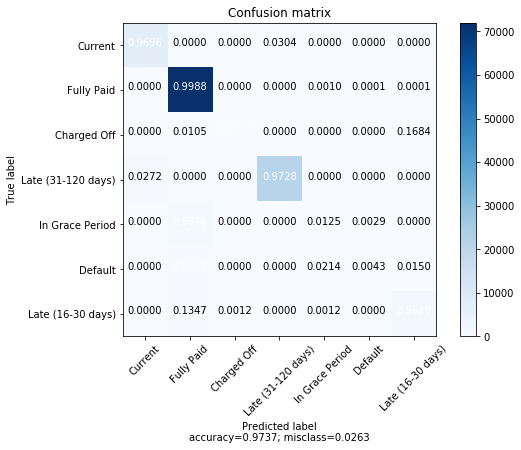

In [113]:
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)

confusion = confusion_matrix(y_test, predictions)

plot_confusion_matrix(confusion, y.unique())

In [116]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)
fbeta_precision = fbeta_score(y_test, predictions, 0.5, average=None)
fbeta_recall = fbeta_score(y_test, predictions, 2, average=None)

print('Accuracy score: {}'.format(accuracy))
print('Precision score: {}'.format(precision.mean()))
print('Recall score: {}'.format(recall.mean()))
print('F1 score: {}'.format(f1.mean()))
print('Fbeta score favoring precision: {}'.format(fbeta_precision.mean()))
print('FBeta score favoring recall: {}'.format(fbeta_recall.mean()))

Accuracy score: 0.9737264854896817
Precision score: 0.7301172445474667
Recall score: 0.6631120032358016
F1 score: 0.6793006968432618
Fbeta score favoring precision: 0.6940490164738288
FBeta score favoring recall: 0.668957059650844


In [109]:
new_stack.to_csv('loan_staus_reduced.csv')